# Optimisation: xNES

This example shows you how to run a global optimisation with [xNES](http://pints.readthedocs.io/en/latest/optimisers/xnes.html).

For a more elaborate example of an optimisation, see: [basic optimisation example](./optimisation-first-example.ipynb).

Minimising error measure
using Exponential Natural Evolution Strategy (xNES)
Running in sequential mode.
Population size: 6
Iter. Eval. Best      Time m:s
0     6      2981287    0:03.1
1     12     1896115    0:03.1
2     18     1388232    0:03.1
3     24     1388232    0:03.2
20    126    90658.25   0:03.2
40    246    88341.68   0:03.2
60    366    88323.31   0:03.2
80    486    88323.28   0:03.3
100   606    88323.28   0:03.3
120   726    88323.28   0:03.3
140   846    88323.28   0:03.4
160   966    88323.28   0:03.4
180   1086   88323.28   0:03.4
200   1206   88323.28   0:03.5
220   1326   88323.28   0:03.5
240   1446   88323.28   0:03.5
260   1566   88323.28   0:03.6
280   1686   88323.28   0:03.6
300   1806   88323.28   0:03.6
320   1926   88323.28   0:03.7
340   2046   88323.28   0:03.7
360   2166   88323.28   0:03.7
376   2256   88323.28   0:03.7
Halting: No significant change for 200 iterations.
Score at true solution: 
88437.2610209
Found solution:          True parameters:


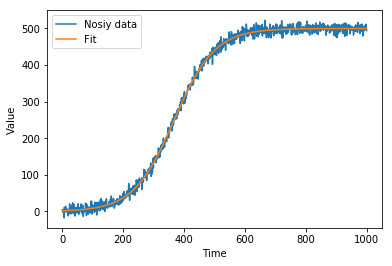

In [1]:
from __future__ import print_function
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as pl

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 1000)
values = model.simulate(real_parameters, times)

# Add noise
values += np.random.normal(0, 10, values.shape)

# Create an object with links to the model and time series
problem = pints.SingleSeriesProblem(model, times, values)

# Select a score function
score = pints.SumOfSquaresError(problem)

# Select some boundaries
boundaries = pints.Boundaries([0, 400], [0.03, 600])

# Perform an optimization with boundaries and hints
x0 = 0.011, 400
sigma0 = [0.01, 100]
found_parameters, found_value = pints.optimise(
    score,
    x0,
    sigma0,
    boundaries,
    method=pints.XNES,
    )

# Show score of true solution
print('Score at true solution: ')
print(score(real_parameters))

# Compare parameters with original
print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(real_parameters[k]))

# Show quality of fit
pl.figure()
pl.xlabel('Time')
pl.ylabel('Value')
pl.plot(times, values, label='Nosiy data')
pl.plot(times, problem.evaluate(found_parameters), label='Fit')
pl.legend()
pl.show()